In [2]:
""" 
1.gather and import the data
2.data cleaning -> inconsistancies , missing values
3.EDA
4.outliers detection and removal (univariate,multi variate)
5.data balance/resampling techniques
6.feature selection/dimentionality reduction
7.feature scaling
8.cross validation
9.hyper parameter tuning
10.model building
11.prediction and evaluation
12.deploy
""";

In [3]:
# data => grapes_new.csv

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('grapes_new.csv')

In [6]:
df

,COLOR_INTENSITY,SHAPE,RIPENESS_PER,ALCOHOL_PER,MALIC_ACID_PER,ASH,ALCALINITY_OF_ASH,MAGNESIUM_MEASURE,TOTAL_PHENOLS,FLAVANOIDS,...,HUE,PROLINE,TEMPERATURE,AVG_HUMIDITY,FERT_NITRO_PER,WATER_O2_PER,WATER_PH,FER_P2O5_PER,SOIL_TYPE,CLASS
0,120.53,elliptical,16.73,14.23,1.71,2.43,15.6,127,2.80,3.06,...,1.04,1065,23.34,54.99,31.21,97.67,7.71,52.02,archean,High
1,112.57,elliptical,20.30,13.20,1.78,2.14,11.2,100,2.65,2.76,...,1.05,1050,23.40,51.91,31.28,99.05,7.66,48.18,archean,High
2,120.78,elliptical,20.81,13.16,2.36,2.67,18.6,101,2.80,3.24,...,1.03,1185,22.29,50.69,31.92,97.95,7.66,28.15,archean,High
3,134.17,elliptical,19.47,14.37,1.95,2.50,16.8,113,3.85,3.49,...,0.86,1480,21.28,47.72,31.79,95.46,7.21,55.95,alluvial,High
4,112.19,round,17.57,13.24,2.59,2.87,21.0,118,2.80,2.69,...,1.04,735,23.76,45.09,31.86,94.45,7.80,55.99,archean,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,102.34,elliptical,21.23,12.07,2.16,2.17,21.0,85,2.60,2.65,...,0.86,378,25.58,46.15,30.14,89.52,8.49,55.83,alluvial,Medium
190,109.80,elliptical,21.67,12.43,1.53,2.29,NaN,86,2.74,3.15,...,0.69,352,24.23,52.23,30.72,85.91,7.73,55.47,archean,Medium
191,103.86,round,22.01,11.79,2.13,2.78,28.5,92,2.13,2.24,...,0.97,466,27.62,48.98,30.46,86.31,7.57,47.57,archean,Medium
192,98.30,elliptical,21.95,12.37,1.63,2.30,24.5,88,2.22,2.45,...,0.89,342,27.54,47.72,30.01,90.60,7.15,45.91,alluvial,Medium


In [7]:
df.shape

(194, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   COLOR_INTENSITY    194 non-null    float64
 1   SHAPE              194 non-null    object 
 2   RIPENESS_PER       192 non-null    float64
 3   ALCOHOL_PER        191 non-null    float64
 4   MALIC_ACID_PER     194 non-null    float64
 5   ASH                194 non-null    float64
 6   ALCALINITY_OF_ASH  188 non-null    float64
 7   MAGNESIUM_MEASURE  194 non-null    int64  
 8   TOTAL_PHENOLS      194 non-null    float64
 9   FLAVANOIDS         194 non-null    float64
 10  PROANTHOCYANINS    194 non-null    float64
 11  HUE                192 non-null    float64
 12  PROLINE            194 non-null    int64  
 13  TEMPERATURE        194 non-null    float64
 14  AVG_HUMIDITY       194 non-null    float64
 15  FERT_NITRO_PER     194 non-null    float64
 16  WATER_O2_PER       190 non

In [9]:
df.describe()

,COLOR_INTENSITY,RIPENESS_PER,ALCOHOL_PER,MALIC_ACID_PER,ASH,ALCALINITY_OF_ASH,MAGNESIUM_MEASURE,TOTAL_PHENOLS,FLAVANOIDS,PROANTHOCYANINS,HUE,PROLINE,TEMPERATURE,AVG_HUMIDITY,FERT_NITRO_PER,WATER_O2_PER,WATER_PH,FER_P2O5_PER
count,194.000000,192.000000,191.000000,194.000000,194.000000,188.000000,194.000000,194.000000,194.000000,194.000000,192.000000,194.000000,194.000000,194.000000,194.000000,190.000000,194.000000,194.000000
mean,116.882113,21.512604,13.024241,2.335103,2.365361,19.485106,99.680412,2.296649,2.016856,1.577216,0.955740,754.164948,26.418247,50.976082,30.562216,90.178000,7.680979,42.195155
std,14.333204,2.386562,0.809621,1.118041,0.268158,3.434971,14.252749,0.634317,1.001351,0.565445,0.228217,316.093797,3.042364,3.367880,1.126867,5.364122,0.509935,10.398205
min,93.000000,16.170000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.410000,0.480000,278.000000,21.020000,44.230000,27.670000,80.360000,6.510000,20.000000
25%,105.470000,20.315000,12.370000,1.610000,2.210000,17.075000,88.000000,1.725000,1.092500,1.225000,0.787500,504.000000,24.222500,48.360000,29.932500,85.685000,7.252500,33.742500
50%,114.910000,21.820000,13.050000,1.865000,2.360000,19.500000,97.500000,2.355000,2.135000,1.545000,0.975000,675.000000,26.195000,51.145000,30.710000,90.160000,7.670000,44.820000
75%,124.060000,23.345000,13.685000,3.082500,2.547500,21.500000,107.000000,2.800000,2.875000,1.950000,1.112500,988.750000,28.737500,53.722500,31.382500,94.445000,8.127500,50.542500
max,167.000000,25.200000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,3.580000,1.710000,1680.000000,32.340000,57.950000,34.160000,99.770000,8.500000,60.870000


In [10]:
df.columns

Index(['COLOR_INTENSITY', 'SHAPE', 'RIPENESS_PER', 'ALCOHOL_PER',
       'MALIC_ACID_PER', 'ASH', 'ALCALINITY_OF_ASH', 'MAGNESIUM_MEASURE',
       'TOTAL_PHENOLS', 'FLAVANOIDS', 'PROANTHOCYANINS', 'HUE', 'PROLINE',
       'TEMPERATURE', 'AVG_HUMIDITY', 'FERT_NITRO_PER', 'WATER_O2_PER',
       'WATER_PH', 'FER_P2O5_PER', 'SOIL_TYPE', 'CLASS'],
      dtype='object')

In [11]:
df.isnull().sum()

COLOR_INTENSITY      0
SHAPE                0
RIPENESS_PER         2
ALCOHOL_PER          3
MALIC_ACID_PER       0
ASH                  0
ALCALINITY_OF_ASH    6
MAGNESIUM_MEASURE    0
TOTAL_PHENOLS        0
FLAVANOIDS           0
PROANTHOCYANINS      0
HUE                  2
PROLINE              0
TEMPERATURE          0
AVG_HUMIDITY         0
FERT_NITRO_PER       0
WATER_O2_PER         4
WATER_PH             0
FER_P2O5_PER         0
SOIL_TYPE            0
CLASS                0
dtype: int64

In [12]:
# leading space remove
df.columns = df.columns.str.strip()

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [14]:
df.fillna(method='ffill', inplace=True)

In [15]:
df.isnull().sum()

COLOR_INTENSITY      0
SHAPE                0
RIPENESS_PER         0
ALCOHOL_PER          0
MALIC_ACID_PER       0
ASH                  0
ALCALINITY_OF_ASH    0
MAGNESIUM_MEASURE    0
TOTAL_PHENOLS        0
FLAVANOIDS           0
PROANTHOCYANINS      0
HUE                  0
PROLINE              0
TEMPERATURE          0
AVG_HUMIDITY         0
FERT_NITRO_PER       0
WATER_O2_PER         0
WATER_PH             0
FER_P2O5_PER         0
SOIL_TYPE            0
CLASS                0
dtype: int64

In [16]:
df.duplicated().sum()

0

## EDA

In [17]:
numerical_cols = df.drop(columns=['SOIL_TYPE', 'CLASS']).columns
numerical_cols

Index(['COLOR_INTENSITY', 'SHAPE', 'RIPENESS_PER', 'ALCOHOL_PER',
       'MALIC_ACID_PER', 'ASH', 'ALCALINITY_OF_ASH', 'MAGNESIUM_MEASURE',
       'TOTAL_PHENOLS', 'FLAVANOIDS', 'PROANTHOCYANINS', 'HUE', 'PROLINE',
       'TEMPERATURE', 'AVG_HUMIDITY', 'FERT_NITRO_PER', 'WATER_O2_PER',
       'WATER_PH', 'FER_P2O5_PER'],
      dtype='object')

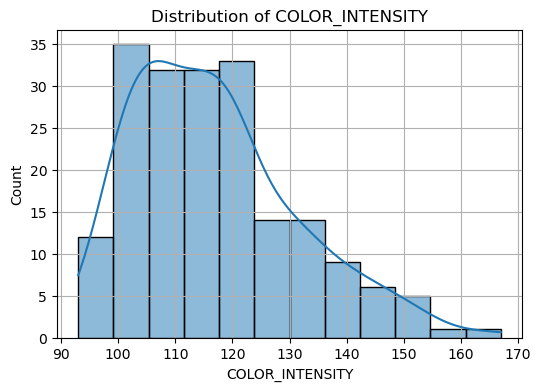

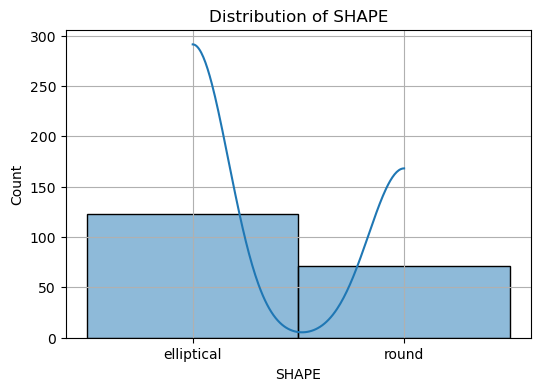

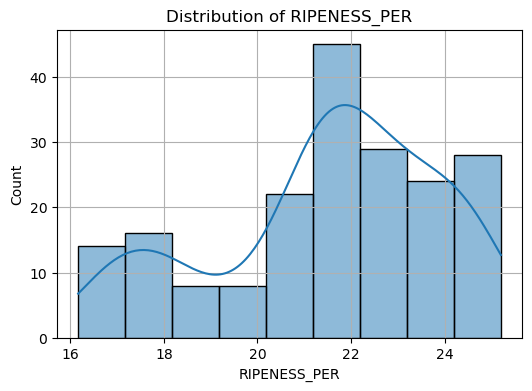

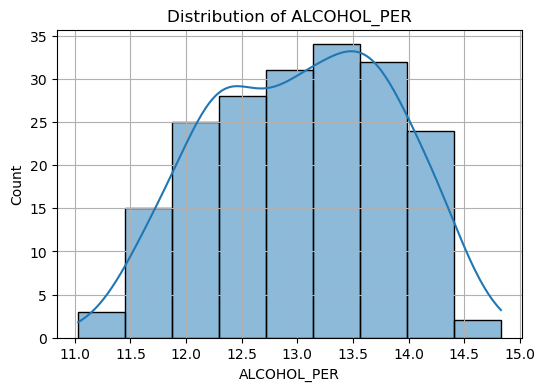

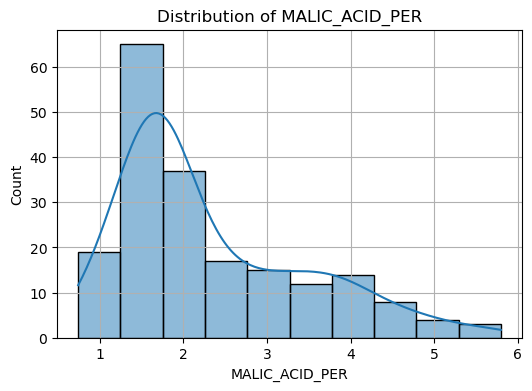

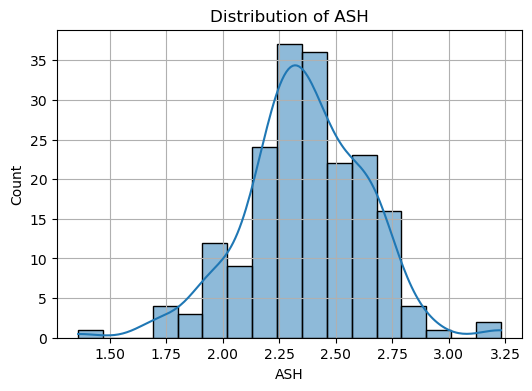

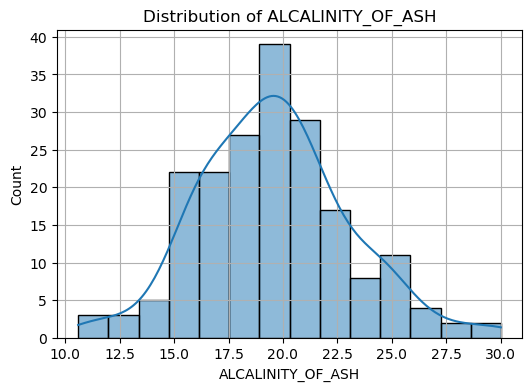

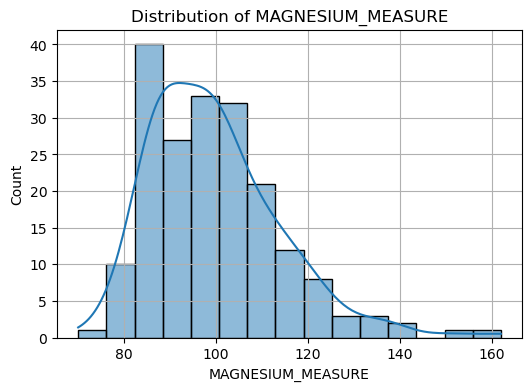

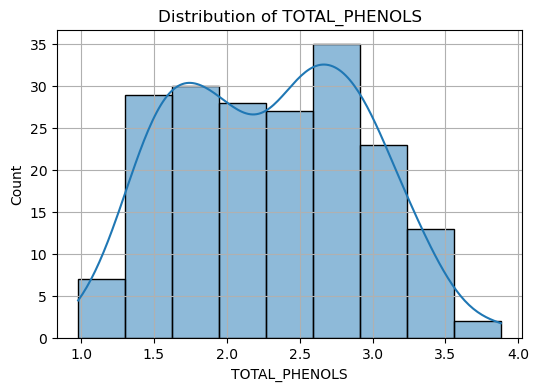

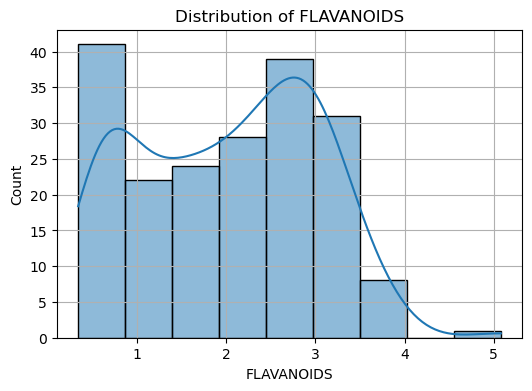

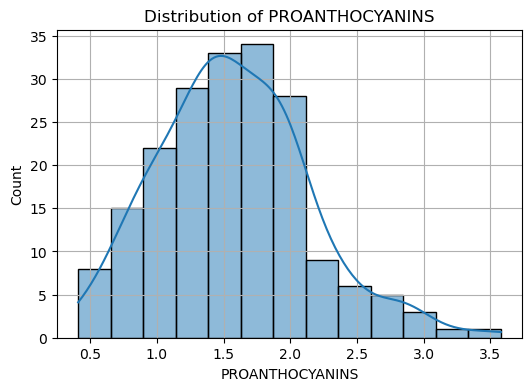

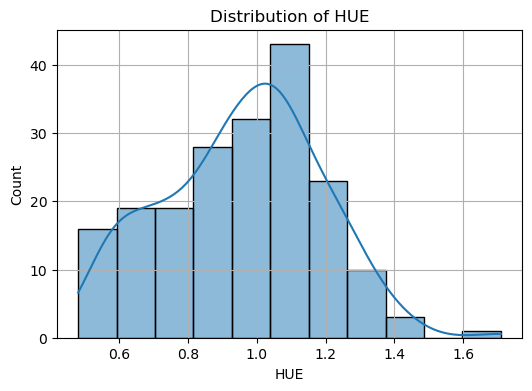

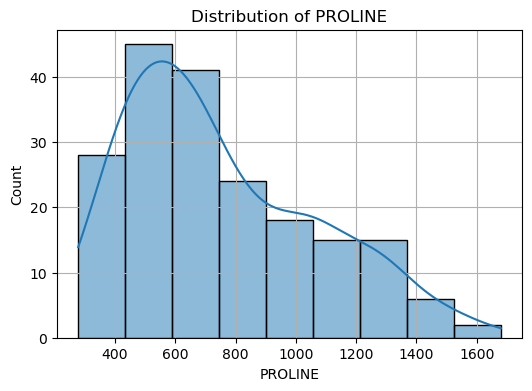

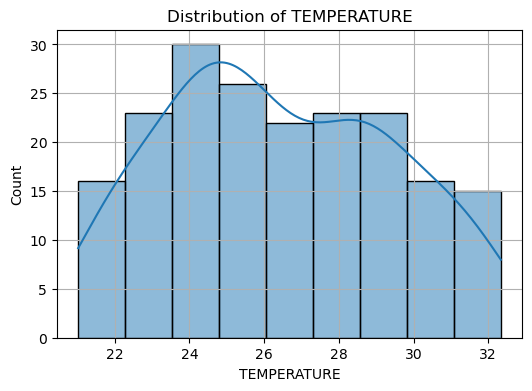

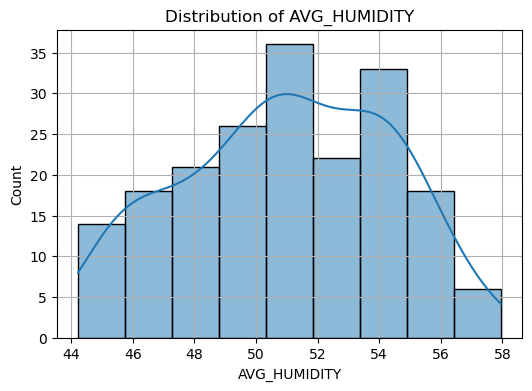

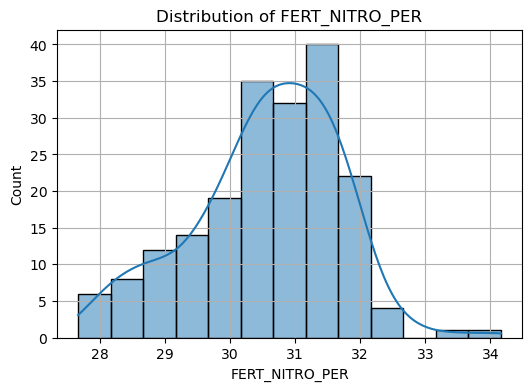

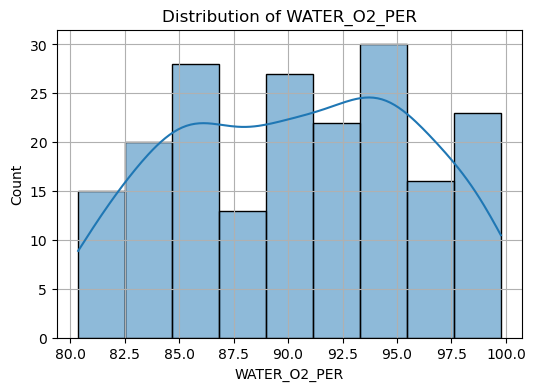

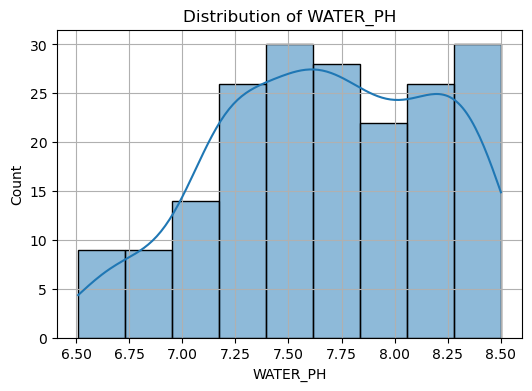

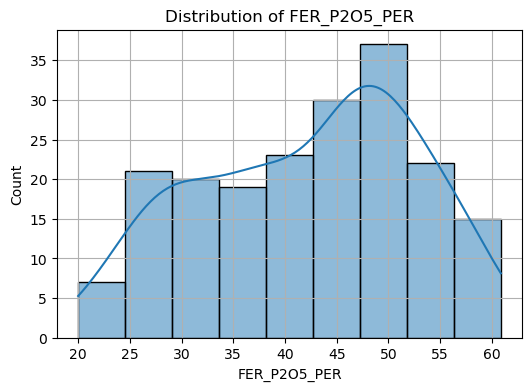

In [18]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True);
    plt.title(f'Distribution of {col}')
    plt.grid()
    plt.show()

In [19]:
#pairplot

In [20]:
 # subset for pairplot


In [21]:
one = df.iloc[:, :4]
one['CLASS'] = df['CLASS']
two = df.iloc[:, 4:8]
three = df.iloc[:, 8:12]
four = df.iloc[:, 12:16]
five = df.iloc[:, 16:20]

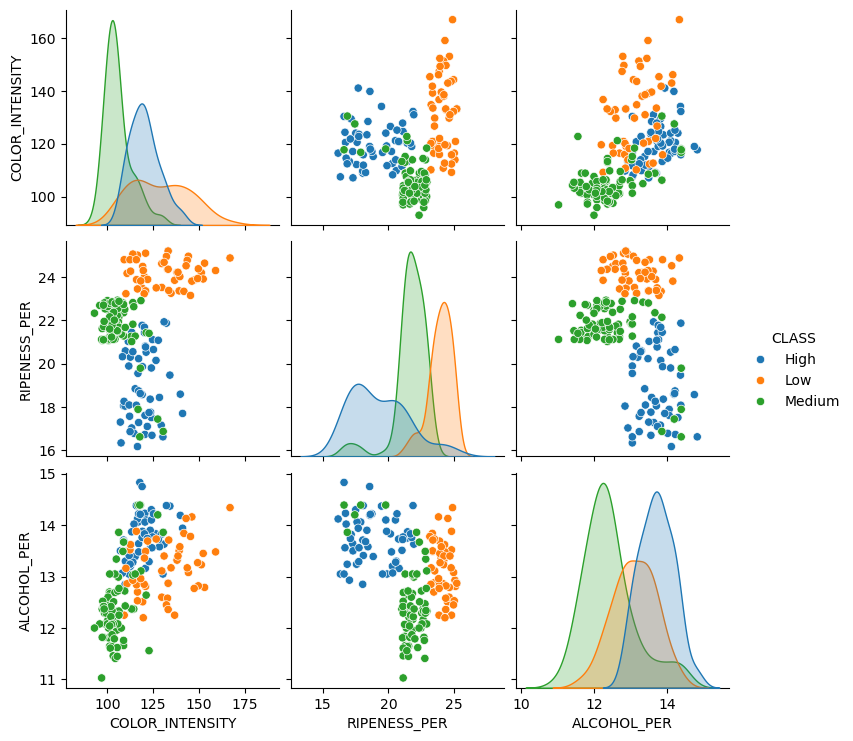

In [22]:
sns.pairplot(one,hue = 'CLASS')

In [23]:
df['CLASS'].value_counts()

CLASS
Medium    76
High      64
Low       54
Name: count, dtype: int64

In [24]:
x = df.drop('CLASS',axis =1)
y = df['CLASS']
 

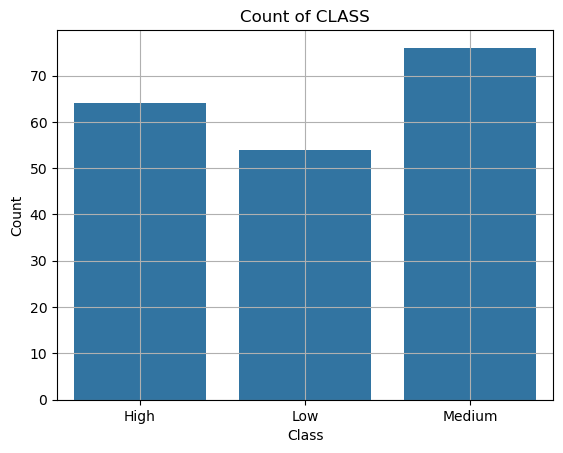

In [25]:
plt.title('Count of CLASS')
plt.xlabel('Class')
plt.ylabel('Count')
sns.countplot(x='CLASS', data=df)
plt.grid()

<Axes: >

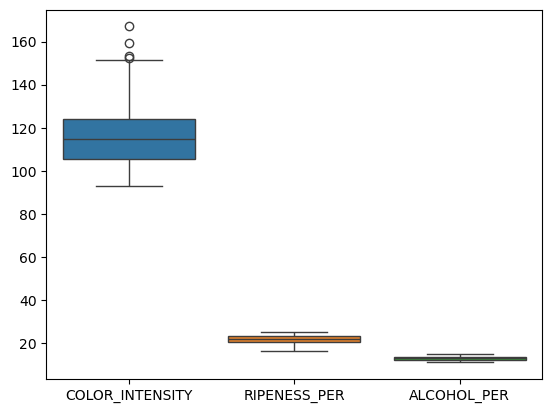

In [26]:
sns.boxplot(one)

<Axes: >

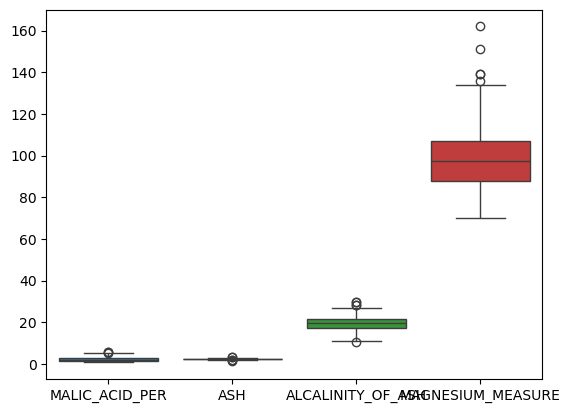

In [27]:
sns.boxplot(two)

In [28]:
# create a function which iterate over all the  columns of the dataframe and will remove the outliers ->will give u cleaned data 

In [29]:
def remove_ol(df, columns = None):

    df_clean = df.copy()
    if columns is None:
        columns = df_clean.select_dtypes(include = 'number').columns.tolist()
    for col in  columns:
        
        Q1 = np.percentile(df_clean[col],25)
        Q3 = np.percentile(df_clean[col],75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

In [30]:
new_df = remove_ol(df)


In [31]:
new_df.shape

(167, 21)

In [32]:
x = new_df.drop('CLASS',axis = 1)
y = new_df['CLASS']
 

In [33]:
x

,COLOR_INTENSITY,SHAPE,RIPENESS_PER,ALCOHOL_PER,MALIC_ACID_PER,ASH,ALCALINITY_OF_ASH,MAGNESIUM_MEASURE,TOTAL_PHENOLS,FLAVANOIDS,PROANTHOCYANINS,HUE,PROLINE,TEMPERATURE,AVG_HUMIDITY,FERT_NITRO_PER,WATER_O2_PER,WATER_PH,FER_P2O5_PER,SOIL_TYPE
0,120.53,elliptical,16.73,14.23,1.71,2.43,15.6,127,2.80,3.06,2.29,1.04,1065,23.34,54.99,31.21,97.67,7.71,52.02,archean
2,120.78,elliptical,20.81,13.16,2.36,2.67,18.6,101,2.80,3.24,2.81,1.03,1185,22.29,50.69,31.92,97.95,7.66,28.15,archean
3,134.17,elliptical,19.47,14.37,1.95,2.50,16.8,113,3.85,3.49,2.18,0.86,1480,21.28,47.72,31.79,95.46,7.21,55.95,alluvial
4,112.19,round,17.57,13.24,2.59,2.87,21.0,118,2.80,2.69,1.82,1.04,735,23.76,45.09,31.86,94.45,7.80,55.99,archean
5,127.54,elliptical,17.44,14.20,1.76,2.45,15.2,112,3.27,3.39,1.97,1.05,1450,22.23,48.39,31.27,94.00,7.35,39.86,alluvial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,102.60,elliptical,21.78,11.87,4.31,2.39,21.0,82,2.86,3.03,2.91,0.75,380,28.32,56.74,28.21,89.72,6.74,38.88,alluvial
189,102.34,elliptical,21.23,12.07,2.16,2.17,21.0,85,2.60,2.65,1.35,0.86,378,25.58,46.15,30.14,89.52,8.49,55.83,alluvial
190,109.80,elliptical,21.67,12.43,1.53,2.29,21.0,86,2.74,3.15,1.77,0.69,352,24.23,52.23,30.72,85.91,7.73,55.47,archean
192,98.30,elliptical,21.95,12.37,1.63,2.30,24.5,88,2.22,2.45,1.90,0.89,342,27.54,47.72,30.01,90.60,7.15,45.91,alluvial


## Feature selection

In [34]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier   
from sklearn.model_selection import train_test_split

In [35]:
fs = SequentialFeatureSelector(DecisionTreeClassifier(), n_features_to_select = 5)


In [36]:
x = pd.get_dummies(x)

In [37]:
fs.fit(x,y)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(),
                          n_features_to_select=5)

In [38]:
fs.get_support()

array([ True, False,  True, False, False, False, False, False, False,
        True, False, False, False, False,  True, False,  True, False,
       False, False, False, False])

In [39]:
x = x.iloc[:,fs.get_support()]

In [40]:
x

,COLOR_INTENSITY,ALCOHOL_PER,PROANTHOCYANINS,FERT_NITRO_PER,WATER_PH
0,120.53,14.23,2.29,31.21,7.71
2,120.78,13.16,2.81,31.92,7.66
3,134.17,14.37,2.18,31.79,7.21
4,112.19,13.24,1.82,31.86,7.80
5,127.54,14.20,1.97,31.27,7.35
...,...,...,...,...,...
188,102.60,11.87,2.91,28.21,6.74
189,102.34,12.07,1.35,30.14,8.49
190,109.80,12.43,1.77,30.72,7.73
192,98.30,12.37,1.90,30.01,7.15


## feature scaling

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [42]:
X_scaled = scaler.fit_transform(x)

## cross validation

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## model building

In [45]:
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=0,criterion = 'entropy')
dt.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [46]:
y_pred = dt.predict(x_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.8095238095238095


In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.7619047619047619


In [48]:
# serialize

In [49]:
import joblib

In [50]:
joblib.dump(dt,'model.pkl')

['model.pkl']

In [51]:
joblib.dump(dt,'scaler.pkl')

['scaler.pkl']

In [53]:
joblib.load('model.pkl')

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [54]:
joblib.load('scaler.pkl')

DecisionTreeClassifier(criterion='entropy', random_state=0)